# Applying the colorization to Wario Land 2

## Setup

First, we install the required libraries.

In [1]:
!pip install -r requirements.txt --quiet

fastai 1.0.60 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Then, we import all the libraries we will use extracting the images from a downlaoded YouTube video.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# plotting
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [4]:
from pytube import YouTube
from video_utils import FrameExtractor, print_video_summary
from image_utils import preview_image, preview_lab_image
from utils import get_random_file
from utils import move_random_files

## Downloading video data

1. Download the video and pring a summary:

In [5]:
video = YouTube('https://www.youtube.com/watch?v=sNflnbbIP1w')

In [6]:
print_video_summary(video)

Summary:
Title: Game Boy Color Longplay [098] Wario Land II
Duration: 376.97 minutes
Rating: 4.86
# of views: 21088


2. Display only the streams with the `mp4` file format:

In [7]:
video.streams.filter(file_extension = "mp4").all()

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400d" progressive="False" type="video">,
 <Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400b" progressive="False" type="video">,
 <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">]

3. Download the selected video:

In [9]:
video.streams.get_by_itag(18).download()

'/Users/eryklewinson/Eryk_private_stuff/video_games_colorization/Game Boy Color Longplay [098] Wario Land II.mp4'

## Image preprocessing

### Extracting frames from the video

1. Instantiate the `FrameExtractor` class using the downloaded video:

In [10]:
fe = FrameExtractor('Game Boy Color Longplay [098] Wario Land II.mp4')

2. Print the video's duration:

In [11]:
fe.get_video_duration()

Duration: 6:16:58.200000


3. Calculate the number of frames assuming extracting a frame every 2 seconds:

In [13]:
N_SECONDS = 150
fe.get_n_images(every_x_frame=N_SECONDS * fe.fps)

Extracting every 4500 (nd/rd/th) frame would result in 151 images.


4. Extract the frames from the video (one frame every 2 seconds):

In [14]:
fe.extract_frames(every_x_frame=N_SECONDS * fe.fps, 
                  img_name='wario_land_2_img', 
                  dest_path='images/wario_land_2/')

Created the following directory: images/wario_land_2/


### Inspecting the images

1. Get a path to a random file from the training set and print the image:

The size of the image is: (288, 320, 3)


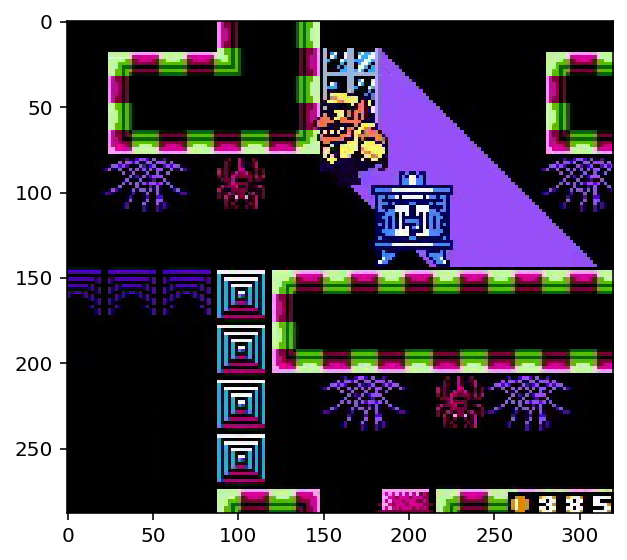

In [37]:
path = get_random_file(from_dir='images/wario_land_2/', 
                       file_format='jpg')

preview_image(path)